In [1]:
import data_from_research
import methods
import evaluation
from sec_certs.dataset.fips import FIPSDataset
from sec_certs.sample import FIPSCertificate
import os

In [2]:
# Directory with policies txt
directory = './dataset/certs/policies/txt'

def check_file_for_phrases(policy, process_text):
    with open(policy, 'r') as file:
        content = file.read()
        return process_text(content)

In [3]:
dset: FIPSDataset = FIPSDataset.from_web_latest()

**Compare "stupid" keyphrases search result with reference**

In [8]:
sample = data_from_research.get_vulnerable_products_from_research(dset)
x931_algos = data_from_research.get_x931_algorithms_from_research(dset)
stupid = []

for cert in dset:
    x931_algo = "None"
    for algo in cert.heuristics.algorithms:
        if "RNG" in algo:
            x931_algo = algo
    if cert.dgst in sample:
        print("X9.31 version used by vulnerable product: ", x931_algo)
    if x931_algo not in x931_algos:
        continue
    dgst = cert.dgst
    policy_path = os.path.join(directory, dgst + ".txt")
    if check_file_for_phrases(policy_path, methods.process_text_stupid):
        stupid.append(dgst)

print("Vulnerable products found with spacy: ", len(stupid), "/", len(sample))
print("True positives: ", len(evaluation.get_true_positives(stupid, sample)))

X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  RNG#556
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  RNG#857
X9.31 version used by vulnerable product:  RNG#166
X9.31 version used by vulnerable product:  RNG#610
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  RNG#531
X9.31 version used by vulnerable product:  RNG#166
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  RNG#169
X9.31 version used by vulnerable product:  RNG#569
X9.31 version used by vulnerable product:  None
X9.31 version used by vulnerable product:  RNG#1046
X9.31 version used by vulnerable product:  RNG#746
X9.31 version used by vulnerable product:  RNG#1217
X9.31 version used by vulnerable product:  RNG#585
X9

Reference vendors:  ['BeCrypt Limited', 'Cisco Systems, Inc.', 'DeltaCrypt Technologies, Inc.', 'Fortinet, Inc.', 'MRV Communications', 'MRV Communications Inc.', 'Neopost Technologies, S.A.', 'Renesas Technology America, Inc.', 'TechGuard Security', 'Tendyron Corporation', 'ViaSat UK Ltd.', 'Vocera Communications, Inc.']
Found vendors:  ['BeCrypt Limited', 'Cisco Systems, Inc.', 'Fortinet, Inc.', 'Neopost Technologies, S.A.', 'TechGuard Security', 'Vocera Communications, Inc.']


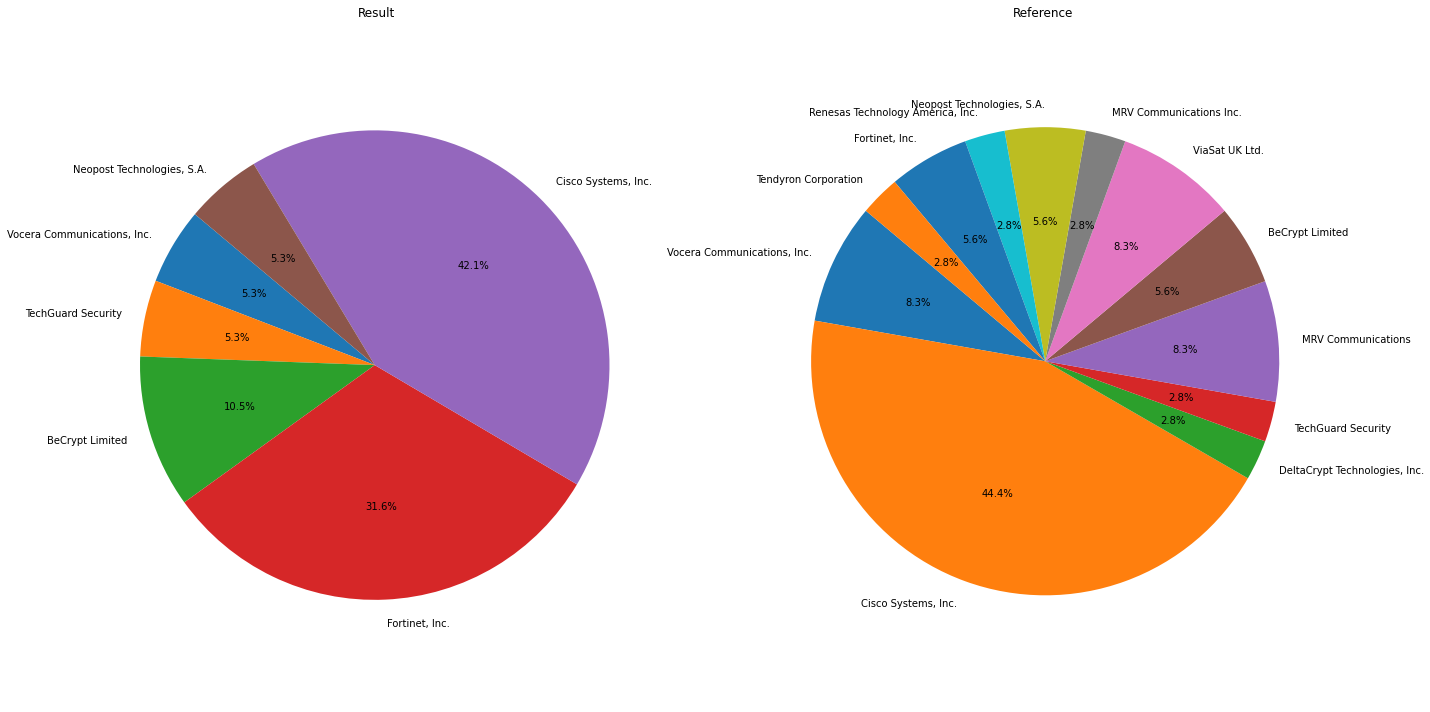

In [9]:
evaluation.get_vendors_statistics(stupid, sample, dset)